In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab
from scipy.stats import norm


In [2]:
def plotOriginalData(X, y):
    V1_ = np.where(y==1)[0]
    V2_ = np.where(y==0)[0]
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Scatter Plot of Raw Data')
    ax.scatter(X[V1_][:,0], X[V1_][:,1], color='blue', label='class 1', marker='o')
    ax.scatter(X[V2_][:,0], X[V2_][:,1], color='red', label='class 0', marker='+')
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('V1')
    ax.set_ylabel('V2')
    ax.legend()
    fig.set_size_inches(10, 6)
   # plt.savefig('Scatter Plot of Raw Data')
    fig.show()


In [3]:
def plotNormLDA(projection,y,Threshold):
    V1_ = np.where(y==1)[0]
    V2_ = np.where(y==0)[0]
    projection1 = []
    projection2 = []
   
    for i in V1_:
        projection1.append(projection[i][0])
      
    for i in V2_:
        projection2.append(projection[i][0])
        
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Normal Distributions LDA')
    ax.set_xlabel('projection')
    ax.set_ylabel('')
   
    m1 ,std1 = norm.fit(projection1) 
    m2 ,std2=norm.fit(projection2)
    #
    #print(std1,std2)
    Z1 = np.linspace(m1-5*std1,m1+5*std1,1000)
    Z2 = np.linspace(m2-5*std2,m2+5*std2,1000)
  
    ax.plot(Z1,norm.pdf(Z1,m1,std1),linestyle='None', marker='o', markersize=2, color='blue', label='class 1')
    ax.plot(Z2,norm.pdf(Z2,m2,std2),linestyle='None', marker='o', markersize=2, color='red', label='class 0')
   
    plt.axvline(x=Threshold,markersize=7,color='green' ,label='line at x = {}'.format(Threshold))  
    ax.legend()
    fig.set_size_inches(10, 6)
    fig.show()
    
        
    
        


In [4]:
def plotLDAProjection(projection,y):
    V1_ = np.where(y==1)[0]
    V2_ = np.where(y==0)[0]
    projection1 = []
    projection2 = []
    #print(V1_)
   # print(V2_)
    for i in V1_:
        projection1.append(projection[i][0])
    for i in V2_:
        projection2.append(projection[i][0])
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Projection of raw data onto W')
    ax.set_xlabel('projection')
    ax.set_ylabel('')
    
    ax.plot(projection1[:V1_.shape[0]],np.zeros(V1_.shape[0]), linestyle='None', marker='o', markersize=7, color='blue', label='class 1')
    ax.plot(projection2[:V2_.shape[0]], np.zeros(V2_.shape[0]), linestyle='None', marker='o', markersize=7, color='red', label='class 0')
    ax.legend()
    fig.set_size_inches(10, 6)
   # plt.savefig('Projection of raw data onto W')
    fig.show()

In [5]:
def metrics(Threshold,projection,y):
    V1_ = np.where(y==1)[0]
    V2_ = np.where(y==0)[0]
    projection1 = []
    projection2 = []
    for i in V1_:
        projection1.append(projection[i][0])
        pass
    for i in V2_:
        projection2.append(projection[i][0])
    c_1 = 0
    c_2 = 0
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in projection1:
            if(i>Threshold):
                c_1 = c_1 + 1
    for i in projection2:
        if(i>Threshold):
            c_2 = c_2 + 1
    if(c_1>c_2):
        for i in projection1:
            if(i>=Threshold):
                tp = tp + 1
            else:
                fn = fn + 1
            
        for i in projection2:
            if(i<=Threshold):
                tn = tn + 1
            else:
                fp = fp+1
    else:
        for i in projection2:
            if(i>=Threshold):
                tp = tp + 1
            else:
                fn = fn + 1
            
        for i in projection1:
            if(i<=Threshold):
                tn = tn + 1
            else:
                fp = fp+1
     
    #print(tp,tn,fp,fn)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Accuracy : ",accuracy)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    #print("Precision : ",precision,"\nrecall :",recall)
    F1_score = 2*precision*recall/(precision+recall)
    print("F1_score :",F1_score)

In [6]:

def solve(m1,m2,std1,std2):
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([a,b,c])

    

In [7]:
def Compute_Threshold(projection,y):
    V1_ = np.where(y==1)[0]
    V2_ = np.where(y==0)[0]
    projection1 = []
    projection2 = []
    for i in V1_:
        projection1.append(projection[i][0])
    for i in V2_:
        projection2.append(projection[i][0])
    m1 ,std1 = norm.fit(projection1) 
    m2 ,std2=norm.fit(projection2)
    maxi= np.array(projection).max()
    mini = np.array(projection).min()
    #print("Maximum:",maxi)
    root = solve(m1,m2,std1,std2)
    #print(root)
    for i in range(len(root)):
        if root[i] < maxi and root[i] > mini:
           # print(root[i])
            Threshold = root[i]
            
            return Threshold,projection1,projection2
            
    
        
    
        

In [8]:
# function to compute feature-wise mean
def computeMean(x):
    return np.mean(x, axis = 0)

In [9]:
# function to compute feature-wise mean for each class
def computeMeanVectors(X,y):
    mean_vectors = []
    for class_label in np.unique(y):
        mean_vectors.append(computeMean(X[y == class_label]))
    
    return mean_vectors

In [10]:
# function to compute Scatter-Within
def calculateSWithin(X, y):
    n_dim = X.shape[1]
    S_Within = np.zeros([n_dim, n_dim])
    mean_vectors = computeMeanVectors(X, y)
    
    for class_label in np.unique(y):
        within_scatter = np.zeros([n_dim, n_dim])
        
        for sample in X[y == class_label]:
            sample, vec = sample.reshape(n_dim, 1), mean_vectors[int(class_label)].reshape(n_dim, 1)
            within_scatter += np.dot(sample - vec, (sample - vec).T)
        S_Within += within_scatter
    
    return S_Within

In [11]:
# function to compute Scatter-Between
def calculateSBetween(X, y):
    n_dim = X.shape[1]
    S_Between = np.zeros([n_dim, n_dim])
    mean_global = computeMean(X)
    mean_vectors = computeMeanVectors(X, y)
    
    for class_label in np.unique(y):
        N = X[y == class_label].shape[0]
        mean_global, vec = mean_global.reshape(n_dim, 1), mean_vectors[int(class_label)].reshape(n_dim, 1)
        S_Between += N * np.dot(vec - mean_global, (vec - mean_global).T)
    
    return S_Between
    

In [12]:
# function to perform Linear Discriminant Analysis (LDA)
def do_LDA(X, y):
    m, n = X.shape
    
    # computing Scatter_Between and Scatter_Within matrices using functions
    S_Between = calculateSBetween(X, y)
    S_Within = calculateSWithin(X, y)
    
    # computing eigenvalues and eigenvectors
    eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_Within), S_Between))
    
    # forming eigenvalue-eigenvector pairs
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

    # sorting eigenvalue-eigenvector pairs in descending order
    eig_pairs.sort(reverse=True, key=(lambda x: x[0]))
    
    #print(eig_pairs)
    # choosing eigenvectors with the largest eigenvalue
    W = eig_pairs[0][1].reshape(n,1)
    #print(W)
    # transforming the samples onto the new subspace
    projection = np.matmul(X, W)
    
    #print('\nThe variance of the projections onto the W axis: ', np.var(projection))
    
    projection = projection.tolist()
    
    return W, projection

In [15]:
def main():
    df = pd.read_csv(filepath_or_buffer='a1_d2.csv', header=None, sep=',')
    #print(df.head())
    col = df.shape[1]
    df.dropna(how="all", inplace=True)
    #df.tail()
    X = df.iloc[:,0:col-1]
    Y = df.iloc[:,col-1:col]
    X = X.apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)
    data_in = df.values
    
    

    X = np.array(X)
    Y = np.array(Y)
    
    Y = Y.reshape(len(Y),)
    
    #plotting raw data
    plotOriginalData(X, Y)
            
    W, projection = do_LDA(X, Y)
    
    #print('\nW from LDA:', W_train)
    
    # plotting projection after LDA
    plotLDAProjection(projection,Y)
    
    global Threshold, projection1, projection2
    Threshold,projection1,projection2 = Compute_Threshold(projection,Y)
    
    plotNormLDA(projection,Y,Threshold)
    
    
    #Y_data_test = Y_data_test.reshape(len(Y_data_test),)

    metrics(Threshold,projection,Y)
    

C:\Users\jaggu\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
C:\Users\jaggu\anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\jaggu\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Accuracy :  1.0
F1_score : 1.0


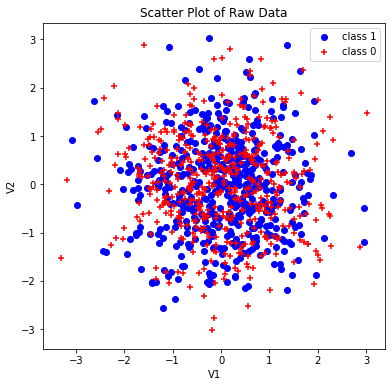

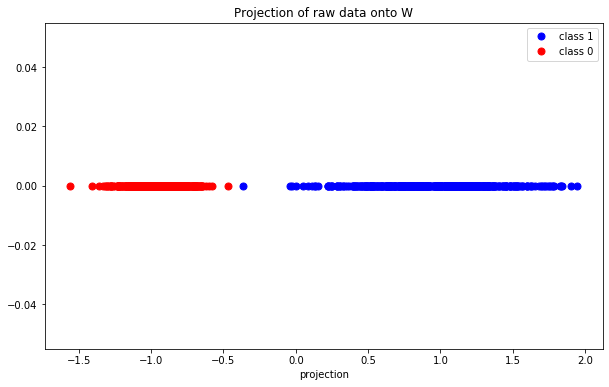

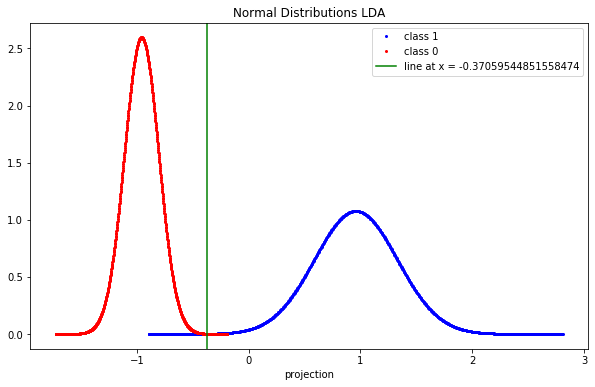

In [16]:
if __name__ == '__main__':
    main()